# Topical Analysis

This notebook extends the analysis done in Filippou et al. (2024) to a topical level.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

chunk_predictions = pd.read_csv("chunk_predictions.csv")
chunk_predictions = chunk_predictions.drop("Text", axis=1)
results_df = chunk_predictions

In [3]:
# Want to aggregate by month instead of quarter

# Step 1: Extract Year and Report Number
results_df["Year"] = results_df["Filename"].str.extract(r"(\d{4})").astype(int)
results_df["Report_Number"] = results_df["Filename"].str.extract(r"\((\d+)\)").astype(int)

# Step 2: Map Report Numbers to Months
    # Got months from Fed website and put them in a spreadsheet
    # See C:\Users\MCOB PHD 14\Desktop\bbFinal\Notebooks\BB_publication_months.xlsx
def get_month(year, report_number):
    # Define mappings for report numbers to months
    if 1970 <= year <= 1978:
        month_mapping = {1: "12", 2: "11", 3: "10", 4: "09", 5: "08", 6: "07", 7: "06", 8: "05", 9: "04", 
                         10: "03", 11: "02", 12: "01"}
    elif year == 1979:
        month_mapping = {1: "11", 2: "10", 3: "09", 4: "08", 5: "07", 6: "05", 7: "04", 8: "03", 9: "01"}
    elif year == 1980:
        month_mapping = {1: "12", 2: "11", 3: "10", 4: "09", 5: "08", 6: "07", 7: "05", 8: "04", 9: "03", 10: "01"}
    elif year in {1981, 2017, 2023}:
        month_mapping = {1: "11", 2: "10", 3: "09", 4: "07", 5: "05", 6: "04", 7: "03", 8: "01"}
    elif year == 2012:
        month_mapping = {1: "11", 2: "10", 3: "08", 4: "07", 5: "06", 6: "04", 7: "02", 8: "01"}
    elif year in {2018, 2020, 2024}:
        month_mapping = {1: "12", 2: "10", 3: "09", 4: "07", 5: "05", 6: "04", 7: "03", 8: "01"}
    elif year in {2002, 2003, 2005, 2006, 2007, 2011, 2016, 2019, 2022}:
        month_mapping = {1: "11", 2: "10", 3: "09", 4: "07", 5: "06", 6: "04", 7: "03", 8: "01"}
    elif year in {2004, 2008, 2009, 2010, 2013, 2014, 2015, 2021}:
        month_mapping = {1: "12", 2: "10", 3: "09", 4: "07", 5: "06", 6: "04", 7: "03", 8: "01"}
    elif year in {1988, 2001}:
        month_mapping = {1: "11", 2: "10", 3: "09", 4: "08", 5: "06", 6: "05", 7: "03", 8: "01"}
    elif year == 1983:
        month_mapping = {1: "12", 2: "11", 3: "09", 4: "08", 5: "07", 6: "05", 7: "03", 8: "02"}
    elif year in {1984, 1985, 1986, 1987, 1990, 1991, 1996, 1997}:
        month_mapping = {1: "12", 2: "10", 3: "09", 4: "08", 5: "06", 6: "05", 7: "03", 8: "01"}
    else:
        month_mapping = {1: "12", 2: "11", 3: "09", 4: "08", 5: "06", 6: "05", 7: "03", 8: "01"}
    return month_mapping.get(report_number, "Unknown")

results_df["Month"] = results_df.apply(lambda row: get_month(row["Year"], row["Report_Number"]), axis=1)

# Step 3: Convert Year and Month to Date-Time Format
results_df["DATE"] = results_df.apply(lambda row: f"{row['Year']}-{row['Month']}-01", axis=1)
results_df["DATE"] = pd.to_datetime(results_df["DATE"], errors="coerce")

# Step 4: Aggregate Data by Month
topic_columns = ["Employment", "Prices", "Consumption", "Manufacturing", "Construction",
                 "Lending", "Uncertainty", "Resources", "Transportation", "Outlook",
                 "Labor", "Capital", "Trade"]

aggregated_df = results_df.groupby("DATE")[topic_columns].sum().reset_index()

# Export to csv
#aggregated_df.to_csv("aggregated_predictions_monthly.csv", index=False)


In [4]:
df = aggregated_df
df['DATE'] = pd.to_datetime(df['DATE'])

# Create dummy variable for dates of recessions
    # Dates defined by Business Cycle Dating Committee of the NBER
df["Recession"] = 0
df.loc[(df["DATE"] >= "1969-12-01") & (df["DATE"] <= "1970-11-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "1973-11-01") & (df["DATE"] <= "1975-03-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "1980-01-01") & (df["DATE"] <= "1980-06-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "1981-07-01") & (df["DATE"] <= "1982-11-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "1990-07-01") & (df["DATE"] <= "1991-03-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "2001-03-01") & (df["DATE"] <= "2001-11-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "2007-12-01") & (df["DATE"] <= "2009-06-01"), "Recession"] = 1
df.loc[(df["DATE"] >= "2020-02-01") & (df["DATE"] <= "2020-04-01"), "Recession"] = 1

# Topic columns
topic_columns = ["Employment", "Prices", "Consumption", "Manufacturing", "Construction",
                 "Lending", "Uncertainty", "Resources", "Transportation", "Outlook",
                 "Labor", "Capital", "Trade"]


In [7]:
# Create four-month moving average for each topic
for topic in topic_columns:
    df[f"{topic}_MA"] = df[topic].rolling(window=4).mean()

# Save new dataframe with just the moving averages
df_ma = df[["DATE"] + [f"{topic}_MA" for topic in topic_columns] + ["Recession"]]
df = df_ma

In [10]:
df

,DATE,Employment_MA,Prices_MA,Consumption_MA,Manufacturing_MA,Construction_MA,Lending_MA,Uncertainty_MA,Resources_MA,Transportation_MA,Outlook_MA,Labor_MA,Capital_MA,Trade_MA,Recession
3,1970-08-01,13.25,8.25,13.00,3.75,3.00,8.75,3.00,1.75,2.25,5.75,11.75,7.75,1.00,1
4,1970-09-01,14.50,9.00,11.75,4.00,2.75,9.00,2.00,1.75,1.25,4.50,9.75,7.75,0.75,1
5,1970-10-01,13.25,7.50,9.00,2.50,2.50,8.50,0.75,2.50,1.25,2.50,10.50,7.25,0.75,1
6,1970-11-01,13.50,8.25,10.25,3.25,2.75,9.00,0.75,2.75,1.50,2.25,12.25,6.25,0.50,1
7,1970-12-01,11.75,9.25,11.75,3.50,2.50,9.00,1.00,2.25,0.75,1.25,12.25,4.50,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2023-11-01,0.50,15.00,21.00,3.75,16.25,21.75,8.00,2.75,6.25,6.25,20.50,2.00,1.50,0
466,2024-01-01,0.75,14.25,20.25,3.50,17.50,22.75,6.50,2.75,6.00,5.00,19.00,1.75,1.25,0
467,2024-03-01,1.00,14.25,21.75,3.00,19.25,22.75,6.75,2.75,6.50,5.25,16.50,1.75,1.00,0
468,2024-04-01,1.00,15.50,19.25,2.50,17.50,21.25,7.25,3.00,7.00,4.25,13.50,1.00,1.00,0


# Using topical counts to forecast recessions

In [11]:
# This is the same approach as Table 1, column 4 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment
# Logit model where 1 = economy in a recession, as defined by NBER

import statsmodels.api as sm

# Topic columns
topic_columns = ["Employment_MA", "Prices_MA", "Consumption_MA", "Manufacturing_MA", "Construction_MA",
                 "Lending_MA", "Uncertainty_MA", "Resources_MA", "Transportation_MA", "Outlook_MA",
                "Labor_MA", "Capital_MA", "Trade_MA"]

# Drop rows with missing values
df = df.dropna()

# Define X as including all the topic columns
X = df[topic_columns]
X = sm.add_constant(X)
y = df['Recession']

# Fit a logit model
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.211794
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Recession   No. Observations:                  467
Model:                          Logit   Df Residuals:                      453
Method:                           MLE   Df Model:                           13
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.4646
Time:                        16:20:51   Log-Likelihood:                -98.908
converged:                       True   LL-Null:                       -184.75
Covariance Type:            nonrobust   LLR p-value:                 8.415e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -9.9895      1.954     -5.112      0.000     -13.820      -6.159
Employment_MA         0.2678      0.093      2.886      0.004       0.086       0.450
Prices_MA             0.3130      0.088      3.569      0.000       0.141       0.485
Consumption_MA       -0.0325      0.082     -0.395      0.693      -0.194       0.129
Manufacturing_MA      0.1065      0.098      1.091      0.275      -0.085       0.298
Construction_MA       0.1827      0.054      3.357      0.001       0.076       0.289
Lending_MA           -0.0119      0.066     -0.182      0.856      -0.141       0.117
Uncertainty_MA       -0.6577      0.162     -4.053      0.000      -0.976      -0.340
Resources_MA          0.3598      0.076      4.721      0.000       0.210       0.509
Transportation_MA    -0.3995      0.182     -2.191      0.028      -0.757      -0.042
Outlook_MA            0.7092      0.183      3.885      0.000       0.351       1.067
Labor_MA             -0.0117      0.076     -0.155      0.877      -0.160       0.137
Capital_MA            0.1236      0.134      0.922      0.356      -0.139       0.386
Trade_MA              0.3608      0.080      4.534      0.000       0.205       0.517
=====================================================================================
"""

In [12]:
# Test for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Prepare the independent variables (X)
X = df[topic_columns]
X = sm.add_constant(X)

# Step 2: Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF results
vif_data

,Variable,VIF
0,const,88.087430
1,Employment_MA,4.275923
2,Prices_MA,4.581021
3,Consumption_MA,3.437149
4,Manufacturing_MA,5.762918
5,Construction_MA,2.434249
6,Lending_MA,2.963202
7,Uncertainty_MA,2.493689
8,Resources_MA,1.182970
9,Transportation_MA,4.642683


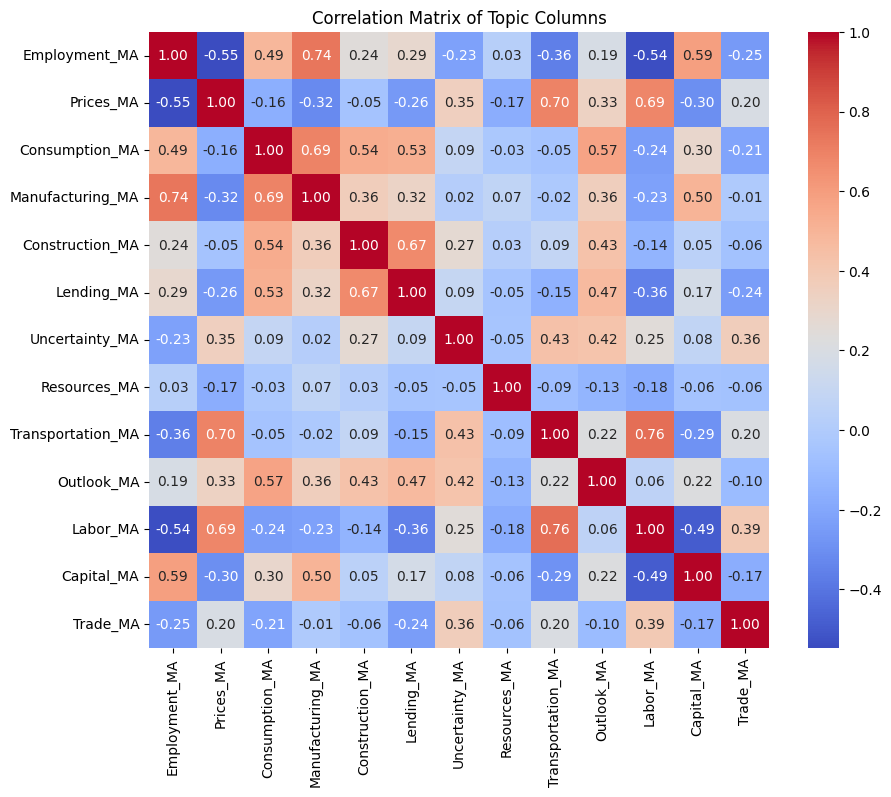

,Employment_MA,Prices_MA,Consumption_MA,Manufacturing_MA,Construction_MA,Lending_MA,Uncertainty_MA,Resources_MA,Transportation_MA,Outlook_MA,Labor_MA,Capital_MA,Trade_MA
Employment_MA,1.000000,-0.547497,0.487876,0.739412,0.238548,0.292066,-0.225046,0.029307,-0.363981,0.188594,-0.536171,0.594005,-0.253148
Prices_MA,-0.547497,1.000000,-0.160797,-0.323496,-0.053902,-0.260135,0.349283,-0.167866,0.696153,0.331615,0.685463,-0.302496,0.195125
Consumption_MA,0.487876,-0.160797,1.000000,0.694673,0.538528,0.526328,0.092351,-0.026698,-0.053413,0.574888,-0.244101,0.297131,-0.209985
Manufacturing_MA,0.739412,-0.323496,0.694673,1.000000,0.362807,0.320632,0.016042,0.070911,-0.018437,0.358670,-0.225447,0.501115,-0.006341
Construction_MA,0.238548,-0.053902,0.538528,0.362807,1.000000,0.668169,0.272090,0.025504,0.085842,0.427843,-0.137631,0.047527,-0.062320
Lending_MA,0.292066,-0.260135,0.526328,0.320632,0.668169,1.000000,0.094602,-0.045803,-0.148788,0.472516,-0.357126,0.170392,-0.244967
Uncertainty_MA,-0.225046,0.349283,0.092351,0.016042,0.272090,0.094602,1.000000,-0.045178,0.434819,0.422678,0.250259,0.077494,0.363989
Resources_MA,0.029307,-0.167866,-0.026698,0.070911,0.025504,-0.045803,-0.045178,1.000000,-0.085243,-0.132906,-0.177651,-0.056989,-0.062930
Transportation_MA,-0.363981,0.696153,-0.053413,-0.018437,0.085842,-0.148788,0.434819,-0.085243,1.000000,0.216390,0.759860,-0.290838,0.203066
Outlook_MA,0.188594,0.331615,0.574888,0.358670,0.427843,0.472516,0.422678,-0.132906,0.216390,1.000000,0.058556,0.219731,-0.095278


In [13]:
# Correlation matrix of topic columns
corr = df[topic_columns].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Topic Columns")
plt.show()

corr

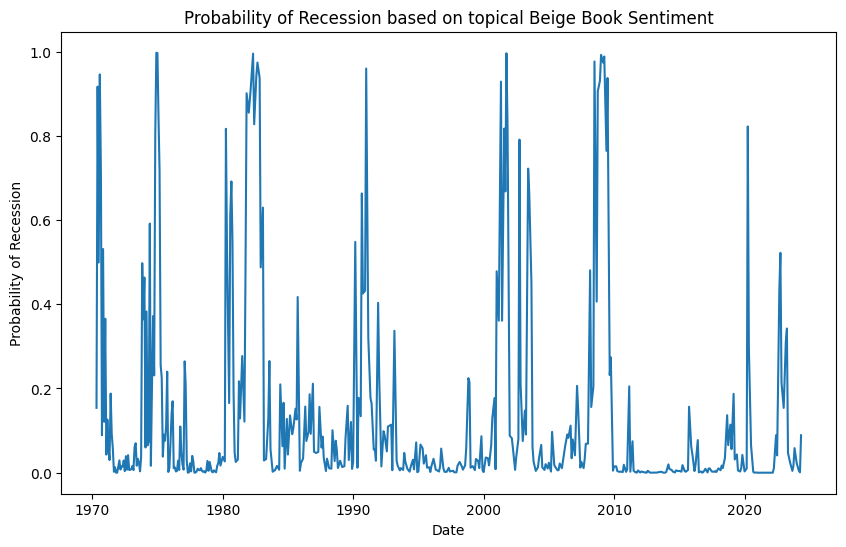

In [45]:
# This recreates Figure 2 from Filippou et al. (2024)
    # Clearly, sentiment from Beige Books is useful for predicting recessions

# Calculate probabilities from the logit model above
df['Recession_probability'] = model.predict(X)

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['Recession_probability'])
plt.xlabel('Date')
plt.ylabel('Probability of Recession')
plt.title('Probability of Recession based on topical Beige Book Sentiment')
plt.show()


# Lags of topical sentiment to predict recessions

This follows Filippou et al., 2024

In [14]:
# Create lags of dependent variable

# Create a three-month lead of the Recession dummy variable
df['Recession_lead_3'] = df['Recession'].shift(3)

# Create a six-month lead of the Recession dummy variable
df['Recession_lead_6'] = df['Recession'].shift(6)

# Create a three-month lag of the Recession dummy variable
df['Recession_lag_3'] = df['Recession'].shift(-3)

# Create a six-month lag of the Recession dummy variable
df['Recession_lag_6'] = df['Recession'].shift(-6)

In [15]:
# This is the same approach as Table 1, column 2 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Drop rows with missing values
dfBinary = df.dropna()

# Define X as including all the topic columns
X = dfBinary[topic_columns]
X = sm.add_constant(X)

# Define y as the six-month lag of the Recession dummy variable
y = dfBinary['Recession_lag_6']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.260146
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Recession_lag_6   No. Observations:                  455
Model:                          Logit   Df Residuals:                      441
Method:                           MLE   Df Model:                           13
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.3256
Time:                        16:22:15   Log-Likelihood:                -118.37
converged:                       True   LL-Null:                       -175.52
Covariance Type:            nonrobust   LLR p-value:                 2.666e-18
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.8981      1.901     -4.155      0.000     -11.624      -4.173
Employment_MA        -0.4971      0.117     -4.258      0.000      -0.726      -0.268
Prices_MA             0.2960      0.081      3.677      0.000       0.138       0.454
Consumption_MA        0.0267      0.066      0.404      0.687      -0.103       0.157
Manufacturing_MA      0.3477      0.121      2.864      0.004       0.110       0.586
Construction_MA       0.1535      0.040      3.869      0.000       0.076       0.231
Lending_MA            0.1741      0.067      2.590      0.010       0.042       0.306
Uncertainty_MA       -0.5767      0.136     -4.244      0.000      -0.843      -0.310
Resources_MA          0.4452      0.082      5.452      0.000       0.285       0.605
Transportation_MA    -0.3478      0.129     -2.700      0.007      -0.600      -0.095
Outlook_MA            0.1711      0.164      1.041      0.298      -0.151       0.493
Labor_MA             -0.0628      0.055     -1.151      0.250      -0.170       0.044
Capital_MA           -0.0790      0.139     -0.568      0.570      -0.352       0.194
Trade_MA              0.1598      0.074      2.169      0.030       0.015       0.304
=====================================================================================
"""

In [16]:
# This is the same approach as Table 1, column 3 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Run the regression
import statsmodels.api as sm

# Drop rows with missing values
dfBinary = df.dropna()

# Define X as including all the topic columns
X = dfBinary[topic_columns]
X = sm.add_constant(X)

# Define y as the 3-month lag of the Recession dummy variable
y = dfBinary['Recession_lag_3']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.273955
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Recession_lag_3   No. Observations:                  455
Model:                          Logit   Df Residuals:                      441
Method:                           MLE   Df Model:                           13
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.2898
Time:                        16:22:22   Log-Likelihood:                -124.65
converged:                       True   LL-Null:                       -175.52
Covariance Type:            nonrobust   LLR p-value:                 7.621e-16
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -10.0666      1.947     -5.171      0.000     -13.882      -6.251
Employment_MA        -0.2951      0.101     -2.925      0.003      -0.493      -0.097
Prices_MA             0.3084      0.081      3.808      0.000       0.150       0.467
Consumption_MA        0.0776      0.066      1.173      0.241      -0.052       0.207
Manufacturing_MA      0.3188      0.112      2.835      0.005       0.098       0.539
Construction_MA       0.1056      0.042      2.541      0.011       0.024       0.187
Lending_MA            0.1842      0.068      2.711      0.007       0.051       0.317
Uncertainty_MA       -0.3243      0.116     -2.787      0.005      -0.552      -0.096
Resources_MA          0.4392      0.081      5.417      0.000       0.280       0.598
Transportation_MA    -0.4429      0.143     -3.106      0.002      -0.722      -0.163
Outlook_MA            0.1209      0.155      0.780      0.436      -0.183       0.425
Labor_MA             -0.0625      0.062     -1.002      0.316      -0.185       0.060
Capital_MA           -0.0231      0.126     -0.183      0.855      -0.271       0.224
Trade_MA              0.2001      0.069      2.909      0.004       0.065       0.335
=====================================================================================
"""

In [17]:
# This is the same approach as Table 1, column 5 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Drop rows with missing values
dfBinary = df.dropna()

# Define X as including all the topic columns
X = dfBinary[topic_columns]
X = sm.add_constant(X)

# Define y as the 3-month lead of the Recession dummy variable
y = dfBinary['Recession_lead_3']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.109434
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Recession_lead_3   No. Observations:                  455
Model:                          Logit   Df Residuals:                      441
Method:                           MLE   Df Model:                           13
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.7193
Time:                        16:22:29   Log-Likelihood:                -49.792
converged:                       True   LL-Null:                       -177.41
Covariance Type:            nonrobust   LLR p-value:                 5.208e-47
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -18.0180      3.702     -4.867      0.000     -25.274     -10.762
Employment_MA         0.9889      0.206      4.795      0.000       0.585       1.393
Prices_MA             0.5965      0.185      3.226      0.001       0.234       0.959
Consumption_MA       -0.1094      0.119     -0.922      0.357      -0.342       0.123
Manufacturing_MA      0.1839      0.162      1.133      0.257      -0.134       0.502
Construction_MA       0.1825      0.088      2.064      0.039       0.009       0.356
Lending_MA           -0.0080      0.108     -0.074      0.941      -0.220       0.204
Uncertainty_MA       -0.4431      0.224     -1.980      0.048      -0.882      -0.005
Resources_MA          0.4629      0.107      4.342      0.000       0.254       0.672
Transportation_MA    -0.5538      0.289     -1.919      0.055      -1.119       0.012
Outlook_MA            0.6232      0.300      2.077      0.038       0.035       1.211
Labor_MA             -0.0458      0.173     -0.264      0.792      -0.386       0.294
Capital_MA            0.3053      0.203      1.501      0.133      -0.093       0.704
Trade_MA              0.1919      0.225      0.851      0.395      -0.250       0.634
=====================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [18]:
# This is the same approach as Table 1, column 6 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Drop rows with missing values
dfBinary = df.dropna()

# Define X as including all the topic columns
X = dfBinary[topic_columns]
X = sm.add_constant(X)

# Define y as the 6-month lead of the Recession dummy variable
y = dfBinary['Recession_lead_6']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.189132
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Recession_lead_6   No. Observations:                  455
Model:                          Logit   Df Residuals:                      441
Method:                           MLE   Df Model:                           13
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.5297
Time:                        16:23:48   Log-Likelihood:                -86.055
converged:                       True   LL-Null:                       -182.98
Covariance Type:            nonrobust   LLR p-value:                 2.488e-34
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.0596      2.288     -3.086      0.002     -11.544      -2.575
Employment_MA         0.5226      0.120      4.339      0.000       0.287       0.759
Prices_MA             0.1071      0.124      0.862      0.389      -0.136       0.351
Consumption_MA       -0.0238      0.080     -0.298      0.766      -0.181       0.133
Manufacturing_MA     -0.1565      0.115     -1.365      0.172      -0.381       0.068
Construction_MA      -0.0117      0.059     -0.197      0.843      -0.128       0.104
Lending_MA            0.0274      0.083      0.331      0.741      -0.135       0.189
Uncertainty_MA        0.0093      0.117      0.080      0.937      -0.221       0.239
Resources_MA          0.1211      0.072      1.673      0.094      -0.021       0.263
Transportation_MA    -0.0843      0.209     -0.404      0.686      -0.493       0.325
Outlook_MA            0.4682      0.222      2.107      0.035       0.033       0.904
Labor_MA             -0.0835      0.125     -0.669      0.503      -0.328       0.161
Capital_MA            0.3314      0.147      2.257      0.024       0.044       0.619
Trade_MA             -0.7617      0.262     -2.902      0.004      -1.276      -0.247
=====================================================================================
"""

# Principal Component Analysis

May come back and do something with this but probably beyond the scope of this article. Because I'd rather be able to explain each topic individually. -- CS 11/29/2024

Explained Variance by Components:
   Component  Explained Variance Ratio
0       PC1                  0.284081
1       PC2                  0.197726
2       PC3                  0.100690
3       PC4                  0.082555
4       PC5                  0.078502


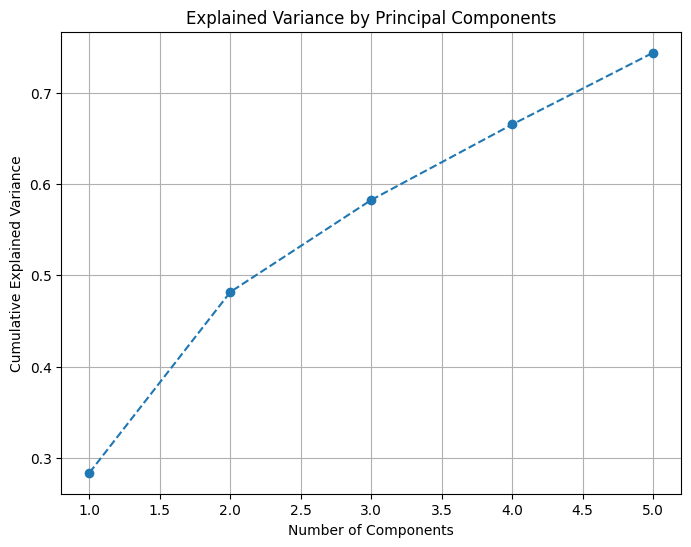

PCA Topic Loadings:
      Employment    Prices  Consumption  Manufacturing  Construction   Lending  \
PC1    0.407581 -0.342198     0.327559       0.346733      0.227705  0.271669   
PC2   -0.024090  0.306701     0.297799       0.200163      0.343969  0.211815   
PC3   -0.289522  0.019654    -0.025139      -0.399419      0.335882  0.512844   
PC4    0.039763 -0.134742     0.070577       0.212334      0.216287 -0.014509   
PC5   -0.192136 -0.232558    -0.218651      -0.183831      0.138745  0.159481   

     Uncertainty  Resources  Transportation   Outlook     Labor   Capital  \
PC1    -0.081782   0.043589       -0.271174  0.148573 -0.372996  0.280062   
PC2     0.404674  -0.104035        0.383784  0.460371  0.256107  0.016975   
PC3    -0.132274  -0.043353       -0.130819  0.071493 -0.131719 -0.436699   
PC4    -0.055871   0.799179        0.168773 -0.184503  0.081883 -0.382365   
PC5     0.544148   0.079579       -0.303758 -0.018516 -0.259530  0.130167   

        Trade  
PC1 -0.204566

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare topic data for PCA
topic_data = aggregated_df[topic_columns]

# Step 2: Standardize the data (important for PCA)
scaler = StandardScaler()
topic_data_scaled = scaler.fit_transform(topic_data)

# Step 3: Perform PCA
n_components = 5  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(topic_data_scaled)

# Step 4: Create a DataFrame for the principal components
pca_columns = [f"PC{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(principal_components, columns=pca_columns)
pca_df["DATE"] = aggregated_df["DATE"]  # Include dates for reference

# Step 5: Analyze explained variance
explained_variance = pd.DataFrame({
    "Component": pca_columns,
    "Explained Variance Ratio": pca.explained_variance_ratio_
})
print("Explained Variance by Components:\n", explained_variance)

# Plot cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker="o", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid()
plt.show()

# Step 6: Examine topic loadings
loadings = pd.DataFrame(pca.components_, columns=topic_columns, index=pca_columns)
print("PCA Topic Loadings:\n", loadings)
